# 02. 베이즈 규칙

In [4]:
# pak::pkg_install('bayesrules')
library(bayesrules)
library(tidyverse)
library(janitor)

In [13]:
data(fake_news)
fake_news %>% glimpse

Rows: 150
Columns: 30
$ title                   <chr> "Clinton's Exploited Haiti Earthquake ‘to Ste…
$ text                    <chr> "0 SHARES Facebook Twitter\n\nBernard Sansaric…
$ url                     <chr> "http://freedomdaily.com/former-haitian-senate…
$ authors                 <chr> NA, NA, "Sierra Marlee", "Jack Shafer,Nolan D"…
$ type                    <fct> fake, real, fake, real, fake, real, fake, fake…
$ title_words             <int> 17, 18, 16, 11, 9, 12, 11, 18, 10, 13, 10, 11,…
$ text_words              <int> 219, 509, 494, 268, 479, 220, 184, 500, 677, 4…
$ title_char              <int> 110, 95, 96, 60, 54, 66, 86, 104, 66, 81, 59, …
$ text_char               <int> 1444, 3016, 2881, 1674, 2813, 1351, 1128, 3112…
$ title_caps              <int> 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0…
$ text_caps               <int> 1, 1, 3, 3, 0, 0, 0, 12, 12, 1, 2, 5, 1, 1, 6,…
$ title_caps_percent      <dbl> 0.000000, 0.000000, 6.250000, 0.000000, 0.0000…
$ text_caps_percent

# 
#### ```janitor::tabyl()``` : 데이터 비율 확인

In [9]:
fake_news |> tabyl(type)

type,n,percent
<fct>,<int>,<dbl>
fake,60,0.4
real,90,0.6


#### ```janitor::adorn_totals()``` : 행/열 집계

In [12]:
fake_news |> tabyl(type) |> adorn_totals('row')

,type,n,percent
,<chr>,<int>,<dbl>
1,fake,60,0.4
2,real,90,0.6
3,Total,150,1.0


# 
#### 실제 뉴스 기사에서는 느낌표를 사용하는 것이 이상하다 라는 선입견 => 
- **가짜 뉴스 제목의 26.67%(16/60)가 느낌표를 사용하지만 실제 뉴스 제목의 2.22%(2/90)만이 느낌표를 사용**

In [15]:
fake_news %>% tabyl(title_has_excl, type) %>% adorn_totals('row')

,title_has_excl,fake,real
,<chr>,<dbl>,<dbl>
1,FALSE,44,88
2,TRUE,16,2
3,Total,60,90


# 
- 기사가 가짜인지 아닌지에 대한 베이지안 구축 다이어그램

<img src="https://www.bayesrulesbook.com/chapters/figs/chapter_2/fake_news_diagram.png" width=500>

# 
# 
### 2-1 베이지안 모델 구축
- 가짜 뉴스 분석은 기사의 ```가짜 대 실제 상태```와, ```느낌표 사용```이라는 두 가지 변수 에 대한 연구로 귀결

# 
#### 사전 확률 모델
- 기사의 40%가 가짜이고 60%가 진짜라고 이전에 결정 => **즉, 새 기사를 읽기도 전에, 기사가 가짜일 확률이 0.4이고 그렇지 않을 확률이 0.6이라고 생각**

#### $P(B) = 0.4\;\;\;P(B^c) = 0.6$

| $event$ | $B$ | $B^c$ | Total |
| -- | -- | -- | -- |
| $probability$ | $0.4$ | $0.6$ | $1$ |

# 
#### 조건부 확률 & 우도
- **기사가 가짜 인 경우 제목에 느낌표를 사용할 확률이 대략 26.67% & 기사가 진짜라면 느낌표 를 사용할 확률은 약 2.22%**
- 느낌표의 발생이 기사가 가짜인지 여부에 따라 달라지거나 조건이 있다고 판단. 

#### $P(A|B) = 0.2667 \;\;\; P(B|B^c) = 0.0222$
#### $L(B|A) = P(A|B) \;\;\; L(B^c|A) = P(A|B^c)$

# 
#### 확률 vs 우도
- **B가 알려져 있을 때, 조건부 확률 함수 $P(.|B)$를 통해, $B$가 발생할 때 알려지지 않은 사건 $A, A^c$의 확률을 비교가능**

$P(A|B)\;\;vs\;\;P(A^c|B)$

# 
- **A가 알려져 있을 때, 우도함수 $L(.|A) \;=\;P(A|.)$를 통해, $B$혹은 $B^c$와 $A$의 상대성을 평가 가능**

$L(B|A)\;\;vs\;\;L(B^c|A)$

# 
#### 가짜 뉴스의 사전확률 및 우도

| $event$ | $B$ | $B^c$ | $Total$ |
| -- | -- | -- | -- |
| $사전확률$ | $0.4$ | $0.6$ | $1$ |
| $우도$ | $0.2667$ | $0.0222$ | $0.2889$ |

# 
#### 정규화 상수
- 모든 기사에서 가짜 및 느낌표 사용여부에 대한 공동 확률 모델

| | $B$ | $B^c$ | $Total$ |
| -- | -- | -- | -- | 
| $A$ | $0.1067 (=0.4 \times 0.2667)$ | $0.0133 (=0.6 \times 0.0222)$ | $0.12$ |
| $A^c$ | $0.2933 (=0.4 \times (1 - 0.2667) $ | $0.5867 (=0.6 \times (1-0.0222)$ | $0.88$ |
| $Total$ | $0.4$ | $0.6$ | $1$ |

# 
#### 베이즈 정리를 통한 사후확률 모델

#### $P(B|A) = {{P(A ∩ B)}\over {P(A)}} = {{P(B)L(B|A)}\over{P(A)}}$ 
#### $P(A) = P(B)L(B|A) + P(B^c)L(B^c|A)$
### $사후확률\;=\;{{사전확률\;\times\;우도}\over{정규화\;상수}}$

# 

#### 가짜뉴스에 대한 사후확률 모델
| $event$ | $B$ | $B^c$ | Total |
| -- | -- | -- | -- |
| $사후확률$ | $0.4$ | $0.6$ | $1$ |
| $사전확률$ | ${{0.4\times0.2667}\over{0.12}}\;=\;0.889$ | ${{0.6\times0.0222}\over{0.12}}\;=\;0.111$ | $1$ |

# 
# 
#### 사후분포 시뮬레이션

In [35]:
article = data.frame(type = c("real", "fake"))
prior <- c(0.6, 0.4)

In [36]:
set.seed(84375)
article_sim <- sample_n(article, size = 10000, weight = prior, replace = T)

,type,n,percent
,<chr>,<int>,<dbl>
1,fake,3958,0.3958
2,real,6042,0.6042
3,Total,10000,1.0000


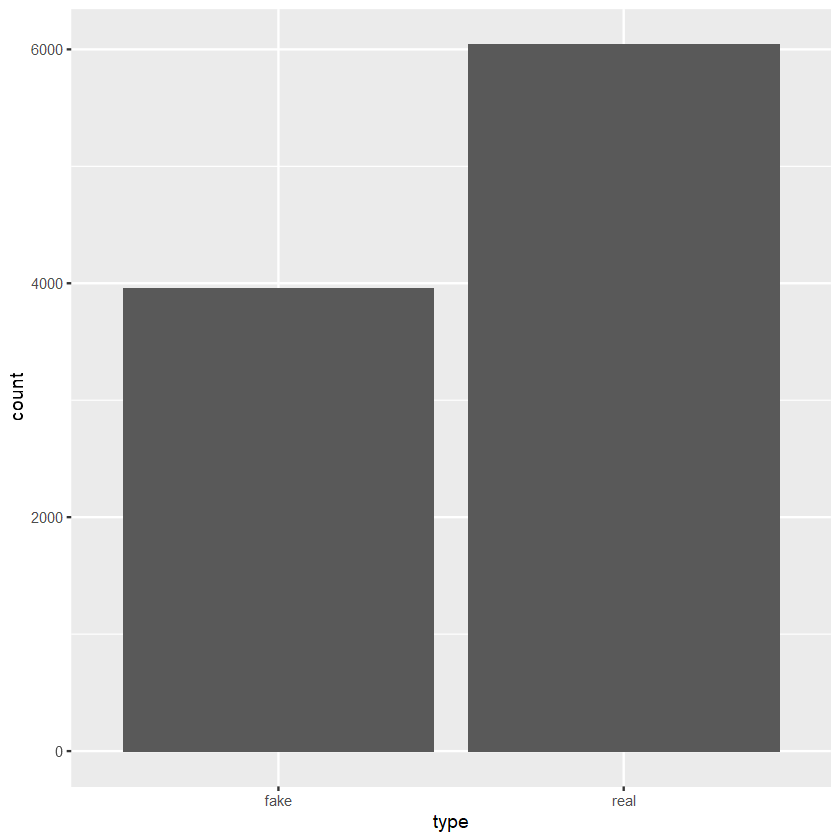

In [37]:
article_sim %>% tabyl(type) %>% adorn_totals('row')
article_sim %>% ggplot(aes(type)) + geom_bar()

- 우도 = ```data_model```

In [38]:
article_sim %>% mutate(data_model = case_when(type == "fake" ~ 0.2667,
                                               type == "real" ~ 0.0222)) -> article_sim

glimpse(article_sim)

Rows: 10,000
Columns: 2
$ type       <chr> "real", "fake", "fake", "real", "real", "real", "real", "re…
$ data_model <dbl> 0.0222, 0.2667, 0.2667, 0.0222, 0.0222, 0.0222, 0.0222, 0.0…


# 
- ```usage``` : 느낌표 사용 여부

In [39]:
data <- c("no", "yes")

set.seed(3)
article_sim %>% group_by(1:n()) %>% 
    mutate(usage = sample(data, size = 1, prob = c(1 - data_model, data_model))) %>% ungroup -> article_sim

In [41]:
article_sim %>% tabyl(usage, type) %>%
    adorn_totals(c('col', 'row')) 

,usage,fake,real,Total
,<chr>,<dbl>,<dbl>,<dbl>
1,no,2924,5904,8828
2,yes,1034,138,1172
3,Total,3958,6042,10000


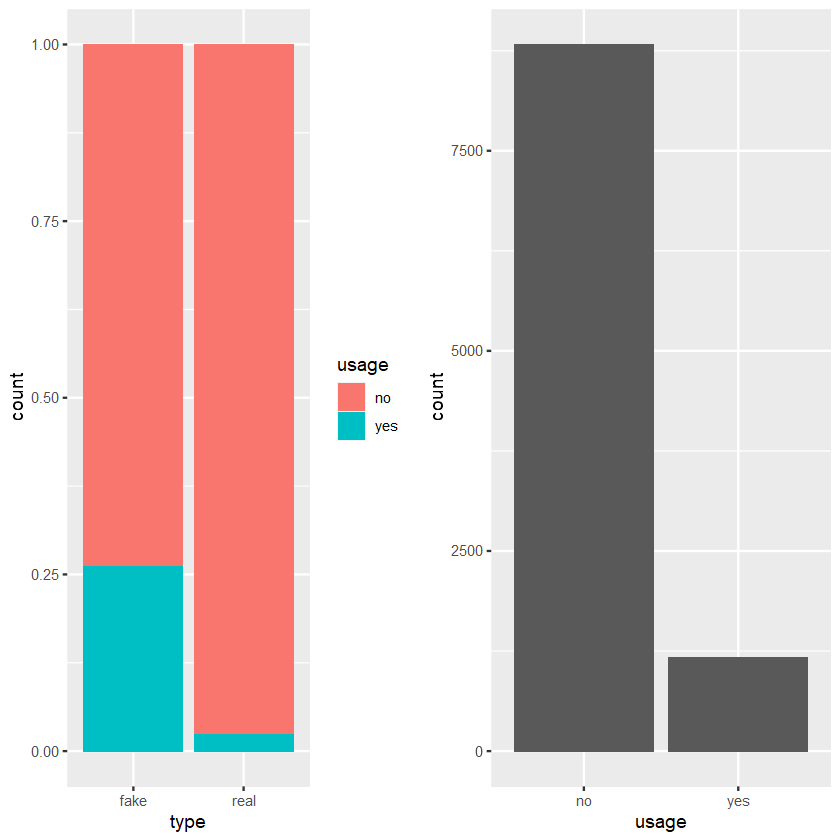

In [50]:
article_sim %>% ggplot(aes(type, fill = usage)) +
    geom_bar(position = "fill") -> p1

article_sim %>% ggplot(aes(usage)) + geom_bar() -> p2

gridExtra::grid.arrange(p1, p2, nrow = 1)

# 
- **느낌표를 사용하는 기사에서, 가짜 기사의 비율**
    - 느낌표를 사용한 기사 1034중 88.2%는 가짜 => **실제 사후 확률 88.9%와 유사**

In [51]:
article_sim %>% filter(usage == "yes") %>%
    tabyl(type) %>% adorn_totals('row')

,type,n,percent
,<chr>,<int>,<dbl>
1,fake,1034,0.8822526
2,real,138,0.1177474
3,Total,1172,1.0000000


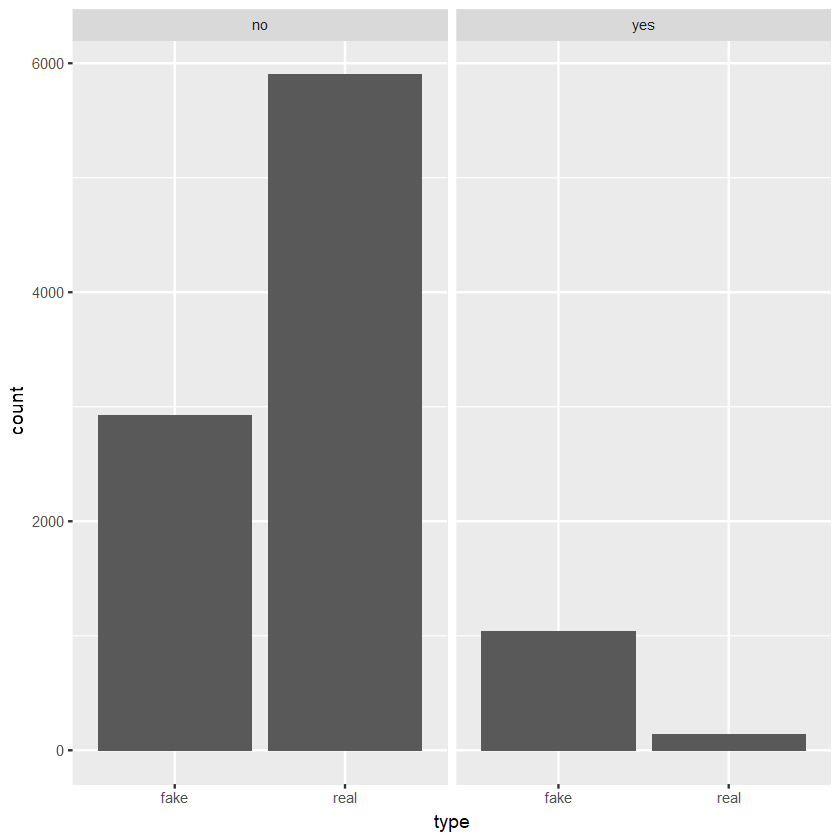

In [53]:
article_sim %>% ggplot(aes(type)) + geom_bar() + facet_wrap(~ usage)

# 
# 
### 2-2 

#### 설문에 응한 사람이 남부에 거주할 확률 :
- $P(남부) = 0.38$

# 
- 사전 모델

| 지역 | 중부 | 북부 | 남부 | 서부 | 총계 |
| -- | -- | -- | -- | -- | -- |
| 확률 | 0.21 | 0.17 | 0.38 | 0.24 | 1 |

- 우도
#### $L(중부|A) = 0.5447, \;\;\; L(북부|A) = 0.2734, \;\;\; L(남부|A) = 0.0792, \;\;\; L(서부|A) = 0.2934$

In [57]:
data(pop_vs_soda)
pop_vs_soda %>% tabyl(pop, region) %>%
    adorn_percentages('col')

pop,midwest,northeast,south,west
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0.3552958,0.7266026,0.92077769,0.7057215
TRUE,0.6447042,0.2733974,0.07922231,0.2942785


# 
- 사후확률

#### $P(A) = L(중부|A)P(중부) + L(북부|A)P(북부) + L(남부|A)P(남부) + L(서부|A)P(서부)$
#### = $0.6447 \times 0.21$  + $0.2734 \times 0.17$ + $0.0792 \times 0.38$  + $0.2934 \times 0.24\;\;\approx0.2826$ 

# 
#### $P(남부|A) = {{P(남부)L(남부|A)}\over{P(A)}}\;\;\;\;={0.38\times0.0792 \over {0.2826}} \approx 0.1065$ 

# 
#### 사전 & 사후 모델
| region | 중부 | 북부 | 남부 | 서부 | 총계 |
| -- | -- | -- | -- | -- | -- |
| 사전확률 | 0.21 | 0.17 | 0.38 | 0.24 | 1 |
| 사후확률 | 0.4791 | 0.1645 | 0.1065 | 0.2499 | 1 |

# 
# 
# 
### 2-3 랜덤변수에 대한 베이지안 모델 구축
#### 사전확률 모델 
- 승률 ($\pi$) : 0과 1 사이의 값을 가짐

| $\pi$ | $0.2$ | $0.5$ | $0.8$ | $Total$ |
| -- | -- | -- | -- | -- |
| $f(\pi)$ | $0.1$ | $0.25$ | $0.65$ | $1$ |

# 
- 확률질량함수(pmf)검토
- $f(0.2) = 0.1,\;\;\; f(0.5)=0.25,\;\;\; f(0.8) = 0.65$

# 
#### 이산형 확률 모델 
#### $f(y) = P(Y = y)$
- $0\leq f(y)\leq1$
- $\sum_{all\;y_i} f(y_i) = 1$

# 
#### 이항 데이터 모델

$f(y|\pi) = P(Y = y|\pi)$
- $0 \leq f(y|\pi) \leq 1\;\;(for\;all\;y_i)$
- $\sum_{all\;y_i} f(y|\pi) = 1$

# 
#### 이항모델 (이항분포)
- $Y$가 시도횟수 n에서의 성공횟수 일 때, **모든 시행이 독립이고, 성공확률이 $\pi$일 때,** $Y$는 $\pi$에 대하여, 조건부 의존하며 이항분포를 따른다

#### $Y|\pi \sim Bin(n, \pi)$
#### 이항분포의 조건부 확률질량함수 (pmf) : $f(y|\pi) = _n C_y \pi^y (1- \pi)^{n-y}\;\;\; for\;y ∈\{0, 1, 2, ..., n\}$

$( _n C_y = {{n!}\over{y! (n-y)!}})$

#### 이항우도함수
- n = 6 일 때
#### $L(\pi|y = 1) = f(y=1|\pi) = _6C_1 \pi^1 (1-\pi)^{6-1} = 6\pi(1-\pi)^5$

| $\pi$ | $0.2$ | $0.5$ | $0.8$ |
| -- | -- | -- | -- |
| $L(\pi|y=1)$ | 0.3932 | 0.0938 | 0.0015 |

# 
# 
#### 확률질량함수 vs 우도함수
- **$\pi$가 알려져있을때, 조건부 질량함수 $f(.|\pi)$를 통해, $\pi$에서의 각각의 사건 발생확률을 비교할 수 있음**

    $f(y_1 |\pi) \;vs\;f(y_2|\pi)$

# 
- **$Y = y$인 것이 알려져 있을때, 우도함수 $L(.|y) = f(y|,)$를 통하여, $\pi$에서의 상대적 우도를 비교할 수 있음**

    $L(\pi_1|y) \;vs\;L(\pi_2|y)$

# 
# 
#### 정규화 상수

$f(y = 1) = \sum_{\pi ∈ \{0.2, 0.5, 0.8\}} L(\pi|y=1) f(\pi)$

# 
#### 사후확률모델
$f(\pi|y) = {{사전확률 \;\times\; 우도}\over{정규화상수}}\;=\;{{f(\pi) L(\pi|y)}\over{f(y)}}$

# 

- **베이즈 정리 (Law of Total Probability, LTP)**
#### $f(y) = \sum_{all\;\pi} f(\pi)L(\pi|y)$

# 

$f(\pi|y=1) \;=\; {{f(\pi)L(\pi|y=1)}\over{f(y=1)}}$ ($for\;\;all\;\;\pi$)

# 

| $\pi$ | $0.2$ | $0.5$ | $0.8$ | Total |
| -- | -- | -- | -- | -- |
| $f(\pi)$ | $0.1$ | $0.25$ | $0.65$ | $1$ |
| $f(\pi|y=1)$ | 0.617 | 0.368 | 0.015 | $1$|

# 
# 
#### 비례성
- **베이즈 정리에 의하여**
### $f(\pi|y) = {{f(\pi) L(\pi|y)}\over{f(y)}}$
- **즉, $f(\pi|y)$의 크기는 분자 $f(\pi)L(\pi\y)$에 의해 결정 (비례한다)된다.**

# 
#### 따라서
### $f(\pi|y) = {{f(\pi) L(\pi|y)}\over{f(y)}}∝f(\pi)L(\pi|y)$
### $posterior\;∝\;prior\;\times\;likelihood $

# 
#### 사후 시뮬레이션

In [58]:
chess <- data.frame(pi = c(0.2, 0.5, 0.8))
prior = c(0.1, 0.25, 0.65)

In [59]:
set.seed(84735)
chess_sim = sample_n(chess, size = 10000, weight = prior, replace = T)

In [62]:
chess_sim <- chess_sim %>% mutate(y = rbinom(10000, size = 6, prob = pi))

In [63]:
chess_sim %>% tabyl(pi) %>% adorn_totals('row')

,pi,n,percent
,<chr>,<int>,<dbl>
1,0.2,1017,0.1017
2,0.5,2521,0.2521
3,0.8,6462,0.6462
4,Total,10000,1.0000


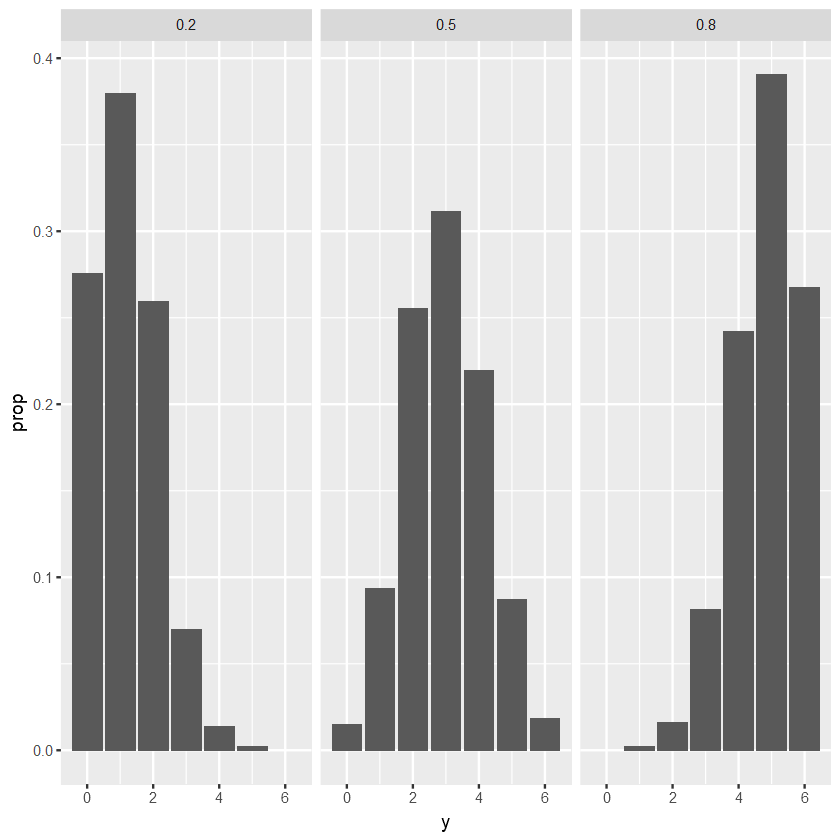

In [65]:
chess_sim %>% ggplot(aes(y)) + stat_count(aes(y = ..prop..)) + facet_wrap(~ pi)

In [67]:
win_one <- chess_sim %>% filter(y == 1)

win_one %>% tabyl(pi) %>% adorn_totals('row')

,pi,n,percent
,<chr>,<int>,<dbl>
1,0.2,386,0.60883281
2,0.5,235,0.37066246
3,0.8,13,0.02050473
4,Total,634,1.00000000


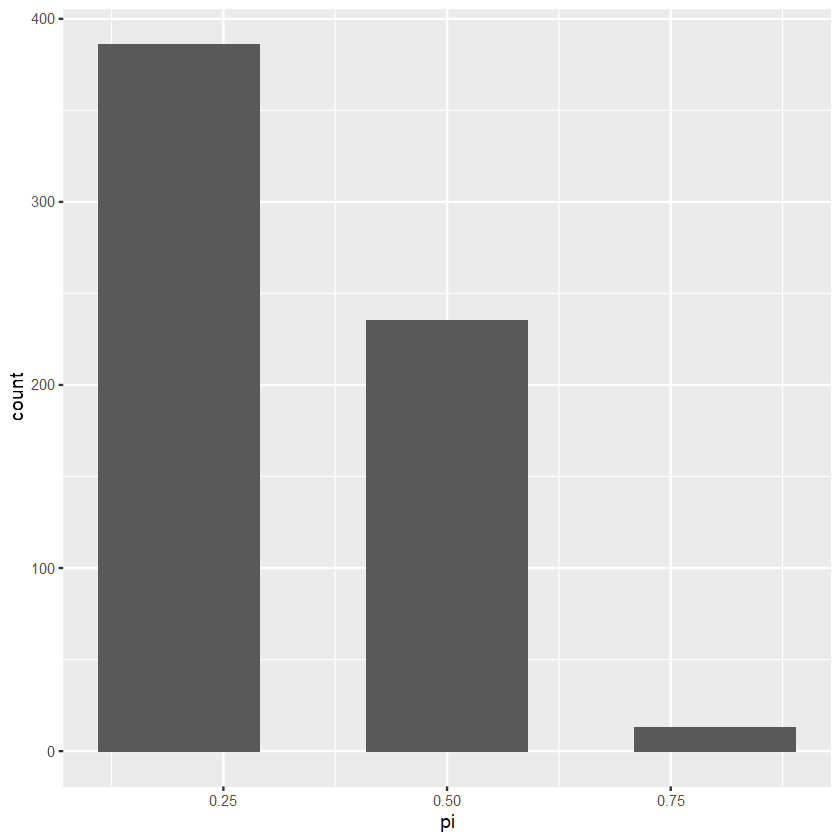

In [68]:
win_one %>% ggplot(aes(x = pi)) + geom_bar()